The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [140]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Start coding here!

In [141]:
df=pd.read_csv("data/nobel.csv")

In [142]:
df.tail()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
995,2023,Chemistry,The Nobel Prize in Chemistry 2023,"""for the discovery and synthesis of quantum dots""",1/3,1030,Individual,Louis Brus,1943-00-00,"Cleveland, OH",United States of America,Male,Columbia University,"New York, NY",United States of America,NaN,NaN,NaN
996,2023,Chemistry,The Nobel Prize in Chemistry 2023,"""for the discovery and synthesis of quantum dots""",1/3,1031,Individual,Aleksey Yekimov,1945-00-00,NaN,USSR (now Russia),Male,Nanocrystals Technology Inc.,"New York, NY",United States of America,NaN,NaN,NaN
997,2023,Literature,The Nobel Prize in Literature 2023,"""for his innovative plays and prose which give...",1/1,1032,Individual,Jon Fosse,1959-09-29,Haugesund,Norway,Male,NaN,NaN,NaN,NaN,NaN,NaN
998,2023,Peace,The Nobel Peace Prize 2023,"""for her fight against the oppression of women...",1/1,1033,Individual,Narges Mohammadi,1972-04-21,Zanjan,Iran,Female,NaN,NaN,NaN,NaN,NaN,NaN
999,2023,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having advanced our understanding of wome...",1/1,1034,Individual,Claudia Goldin,1946-00-00,"New York, NY",United States of America,Female,Harvard University,"Cambridge, MA",United States of America,NaN,NaN,NaN


In [143]:
# What is the most commonly awarded gender and birth country?
top_gender=df["sex"].mode()[0]
top_country=df["birth_country"].mode()[0]

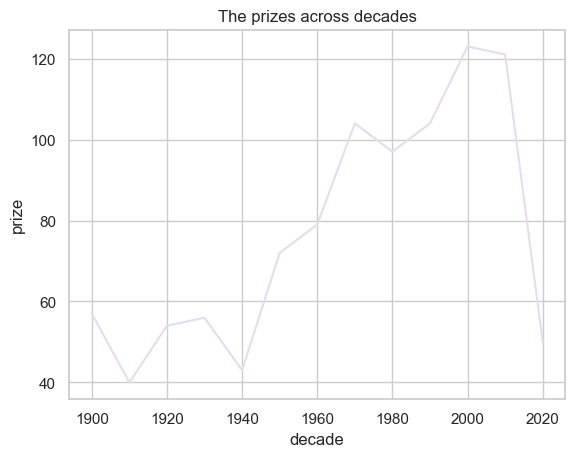

In [206]:
#                           " # of prizes throught dicades "
of_prize_per_decade=pd.DataFrame(df.groupby("decade")["prize"].count()).reset_index()
sns.lineplot(x="decade",y="prize",data=of_prize_per_decade)
sns.set_style("whitegrid")
plt.title("The prizes across decades")
plt.show()

In [144]:
#Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?

df["decade"]=np.floor(df["year"]/10)*10
df["decade"]=df["decade"].astype(int)
usborn = df[df["birth_country"] == top_country].groupby("decade")["decade"].count()
totalborn = df.groupby("decade")["decade"].count()
ratio =pd.DataFrame( usborn / totalborn)
ratio.columns=["rate"]
max_rate_index = ratio["rate"].idxmax()
max_decade_usa = int(max_rate_index)
# or 
'''
df['usa_born_winners'] = df['birth_country'] == 'United States of America'
df['decade'] = np.floor(df['year'] / 10) * 10
df['decade'] = df['decade'].astype(int)
ratio = df.groupby('decade', as_index=False)['usa_born_winners'].mean()
max_decade_usa = int(ratio[ratio['usa_born_winners'] == ratio['usa_born_winners'].max()]['decade'].values[0])
'''

"\ndf['usa_born_winners'] = df['birth_country'] == 'United States of America'\ndf['decade'] = np.floor(df['year'] / 10) * 10\ndf['decade'] = df['decade'].astype(int)\nratio = df.groupby('decade', as_index=False)['usa_born_winners'].mean()\nmax_decade_usa = int(ratio[ratio['usa_born_winners'] == ratio['usa_born_winners'].max()]['decade'].values[0])\n"

In [145]:
# Which decade and Nobel Prize category combination had the highest proportion of female laureates?
max_female_dict=df[df["sex"]=="Female"]["year"].mode()[0]
usborn = df[df["sex"]=="Female"].groupby(["decade","category"])["decade"].count()
totalborn = df.groupby(["decade","category"])["decade"].count()
prop =pd.DataFrame( usborn / totalborn)
prop.columns=["rate"]
max_female_dict=dict(prop[prop["rate"]==prop["rate"].max()].index.values)


In [146]:
# Who was the first woman to receive a Nobel Prize, and in what category?
cond1=df["sex"]=="Female"

first_woman_name=df[cond1].reset_index().sort_values(by="year").loc[0,"full_name"]

first_woman_category=df[cond1].reset_index().sort_values(by="year").loc[0,"category"]
# or 
# nobel[nobel['sex'] == 'Female'].nsmallest(n=1, columns='year')


In [147]:
#Which individuals or organizations have won more than one Nobel Prize throughout the years?


data=df.groupby("full_name")["prize"].count()
data=pd.DataFrame(data)
repeat_list=list(data[data["prize"]>1].index.values)
# or 
#df.groupby('full_name').filter(lambda winners: len(winners) >= 2)



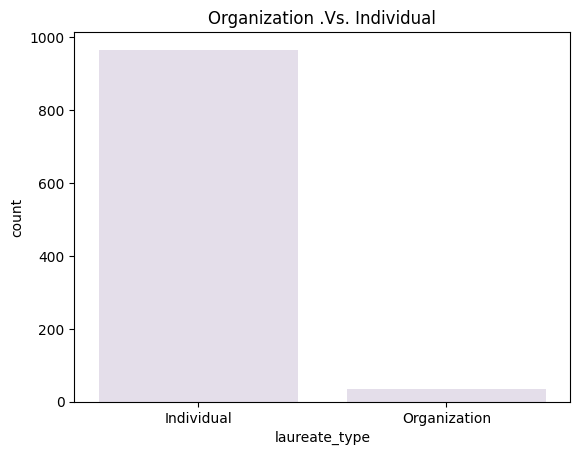

In [162]:

#                            "# of winner either individual or organization"
figure=sns.countplot(x="laureate_type",data=df)
figure.set_title("Organization .Vs. Individual")
plt.show()



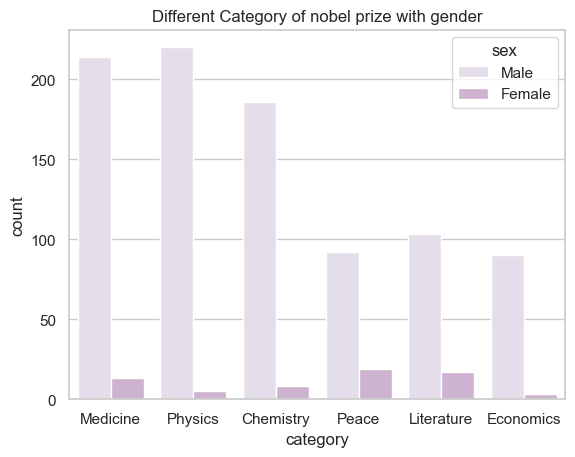

In [205]:
# order of category with nobel prize
order_list=["Medicine","Physics","Chemistry","Peace","Literature","Economics"]
sns.countplot(x="category",data=df,order=order_list,hue="sex")
plt.title("Different Category of nobel prize with gender")
sns.set_context("notebook")
plt.show()